In [4]:
import multitaper as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from multitaper import mtspec



In [9]:
df = pd.read_csv("KATNP.accel.e.txt", sep=' ')

In [11]:
t = df.iloc[:, 0]
accel = df.iloc[:, 1]
dt = t[1] - t[0]

In [69]:
# MT PSD
TW = 4
ntapers = 6
mt = mtspec.MTSpec(accel.values, nw=TW, kspec=ntapers, dt=dt)

In [70]:
freq_mt = mt.freq
mt_psd = mt.spec

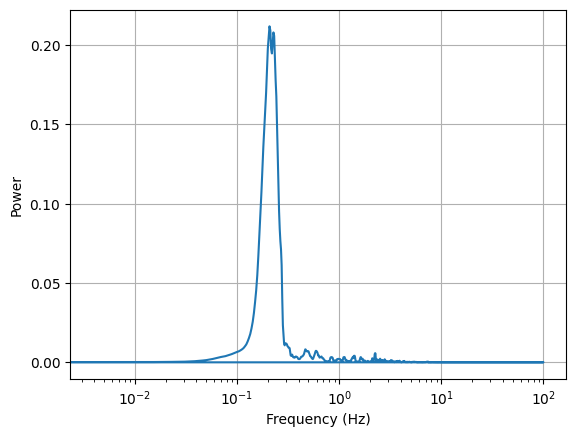

In [71]:
plt.semilogx(freq_mt, mt_psd)
plt.grid(True)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power");

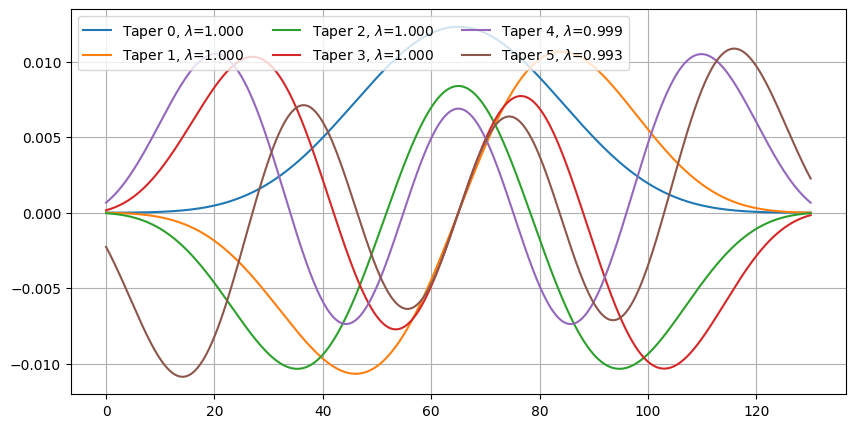

In [72]:
fig, ax = plt.subplots(1, figsize=(10, 5))
for k in np.arange(ntapers):
    ax.plot(t, mt.vn[:, k], label=f"Taper {k}, $\lambda$={mt.lamb[k]:.3f}")

ax.legend(ncol=3, loc='best')
ax.grid(True)

In [73]:
J = mt.jackspec()

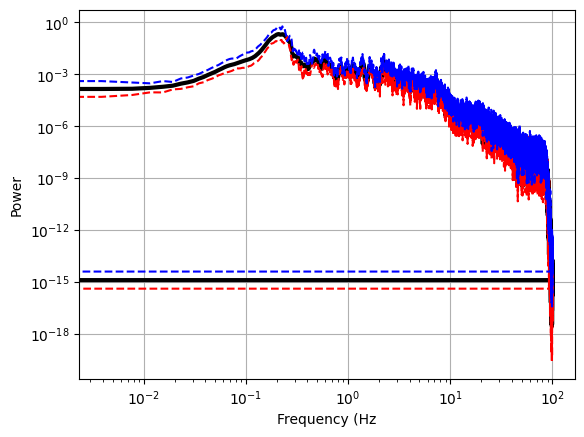

In [79]:
ci_high = J[:, 1]
ci_low = J[:, 0]
plt.loglog(freq_mt, mt_psd, c='k', lw=3)
plt.loglog(freq_mt, ci_low, '--r')
plt.loglog(freq_mt, ci_high, '--b')
plt.grid()
plt.xlabel("Frequency (Hz")
plt.ylabel("Power");
